In [1]:
from keras.datasets import mnist

Using TensorFlow backend.


In [2]:
(train_imgaes, train_labels), (test_images, test_labels) = mnist.load_data()

In [3]:
train_imgaes
# Images are encoded in numpy arrays 

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [4]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [5]:
test_images

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [6]:
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [7]:
train_imgaes.shape

(60000, 28, 28)

In [45]:
train_images.dtype

dtype('float32')

In [56]:
digit = train_imgaes[1] # Tensor slicing 

In [54]:
import matplotlib.pyplot as plt

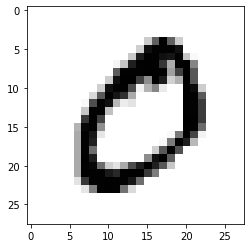

In [57]:
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

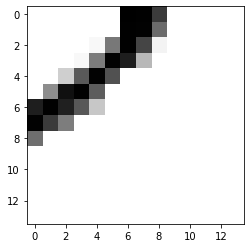

In [67]:
# Crop images with the pixel positions, tensor slicing 
plt.imshow(digit[14:, 14:], cmap=plt.cm.binary)
plt.show()

In [8]:
len(train_labels)

60000

In [9]:
# So there are 60000 labels and 60000 Images in trainning 

In [10]:
test_images.shape

(10000, 28, 28)

In [11]:
len(test_labels)

10000

> First train images and the train labels are feed into neural networks, so it learn from images and the associated labels. Then it will predict for test_images, we will check test_labels and the predicted_lables are matching. 

In [12]:
from keras import models

In [13]:
from keras import layers

In [14]:
network = models.Sequential()

In [15]:
network.add(layers.Dense(512, activation='relu', input_shape=(28*28,)))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [16]:
network.add(layers.Dense(10, activation='softmax'))

> Our Network consists of two sequential layers which are densely connected, fully connected. And the second layer 10 way softmax layer, Which outputs array of 10 probilistic socres for our 10 digit labels 

In [17]:
# Compilation part
network.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [40]:
# Need to preprocess the data 
# TODO: Add more points claiming why we need this
train_images = train_imgaes.reshape((60000, 28*28))

In [41]:
train_images = train_images.astype('float32')/255

In [20]:
test_images = test_images.reshape(10000, 28*28,)
test_images = test_images.astype('float32')/255

In [21]:
# Categorically encode the labels 
from keras.utils import to_categorical

In [22]:
train_labels = to_categorical(train_labels)

In [23]:
test_labels = to_categorical(test_labels)

In [24]:
# Train the network 

In [42]:
network.fit(train_images, train_labels, epochs=5, batch_size=128)


Epoch 1/5
60000/60000 [==============================] - 2s 39us/step - loss: 0.2586 - accuracy: 0.9250
Epoch 2/5
60000/60000 [==============================] - 2s 36us/step - loss: 0.1055 - accuracy: 0.9688
Epoch 3/5
60000/60000 [==============================] - 2s 35us/step - loss: 0.0701 - accuracy: 0.9791
Epoch 4/5
60000/60000 [==============================] - 2s 36us/step - loss: 0.0505 - accuracy: 0.9846
Epoch 5/5
60000/60000 [==============================] - 2s 37us/step - loss: 0.0389 - accuracy: 0.9883


In [ ]:
# Training Accuaracy 98.9%

In [43]:
test_loss, test_acc = network.evaluate(test_images, test_labels)

10000/10000 [==============================] - 0s 29us/step


In [44]:
test_acc

0.9786999821662903

> The difference between the training and the testing accuracy is an example of overfitting 